In [92]:
#Nome: Pedro Paulo de Avelar Fioresi Gadioli
#RA: 22009447
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from math import sqrt


In [100]:
%%latex
Para a Série Trigonométrica de Fourier sobre a função $f(t)=|sin(t)| \\$
Primeiramente vamos calcular o valor de $a_0$, sendo $a_0=\frac{1}{T_0}\int_{t_1}^{t_1+T_0}g(t)dt$, onde $g(t)=|sin(t)|$ e período $T_0=\pi$, como é mostrado no gráfico.

$\\$ Então temos $a_0 = \frac{1}{\pi}\int_{0}^{\pi}|sin(t)|dt$
$$a_0 = \frac{1}{\pi}\int_{0}^{\pi}|sin(t)|dt \\ = \frac{1}{\pi}[-cos(t)]_{0}^{\pi} \\ =\frac{2}{\pi}$$
Agora vamos calcular os coeficientes seno e cosseno, porem como podemos observar no gráfico a função é par, sendo assim o coeficiente seno é igual a zero.
$\\ $ Sendo $a_n=\frac{2}{T_0}\int_{t_1}^{t_1+T_0}g(t)cos(2\pi nf_0t)dt$
$$a_n=\frac{2}{\pi}\int_{t_1}^{t_1+T_0}g(t)cos(\frac{2\pi nt}{\pi})dt \\ =\frac{2}{\pi}\int_{0}^{\pi}|sin(t)|cos(2nt)dt \\ =\frac{2}{\pi}\frac{2cos^2(\pi n)}{1-4n^2} \\ a_n=\frac{4cos^2(\pi n)}{\pi (1-4n^2)}$$
$\\ $ Com isso podemos montar a equação para a série trigonométrica de Fourier
$$= a_0 + \sum_{n=1}^{\infty}a_n cos(\frac{2 \pi n t}{\pi}) \\ =\frac{2}{\pi} + \sum_{n=1}^{\infty}\frac{4cos^2(\pi n)}{\pi (1-4n^2)} cos(\frac{2 \pi n t}{\pi})$$



<IPython.core.display.Latex object>

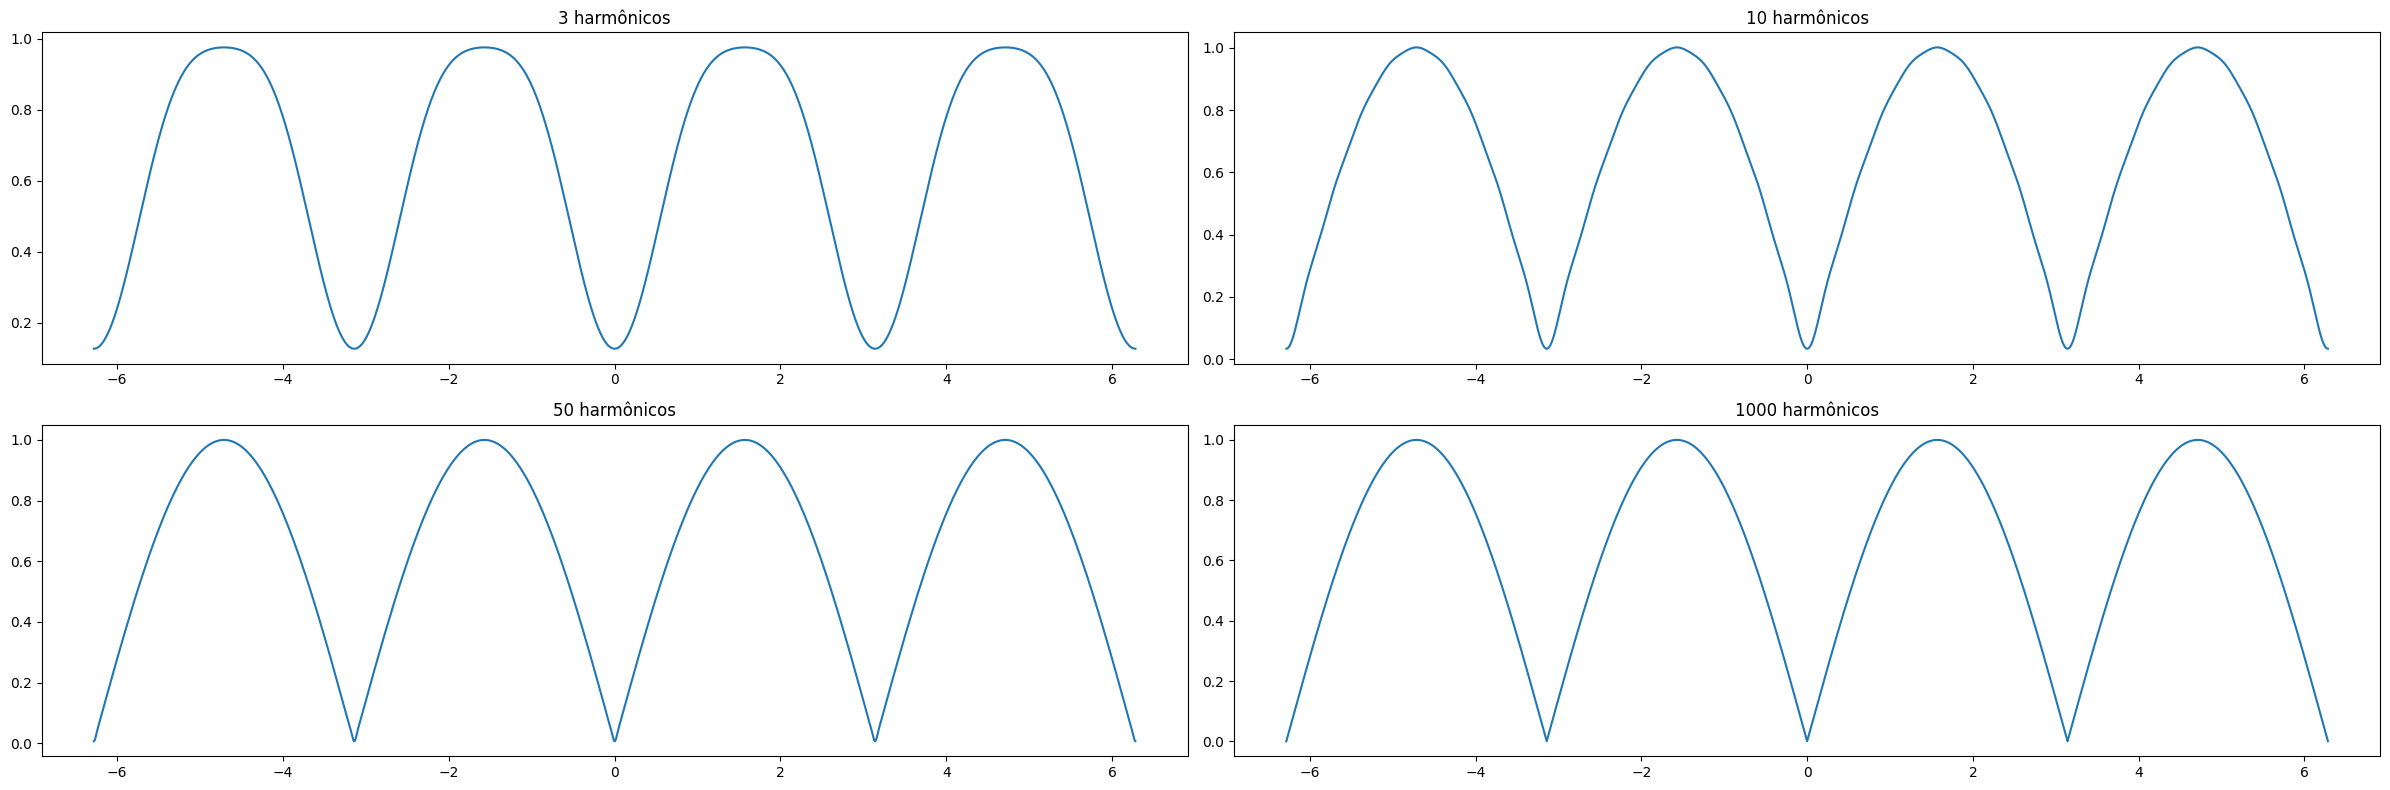

In [103]:
#Série Trigonométrica de Fourier

t = np.arange(-2*pi, 2*pi, 0.001)                                 # Limitando a variação entre -2pi e 2pi com passo 0,001

def trigonometric_serie(Nh):                                          # Cálculo da série trigonométrical em relação à quantidade de harmônicos
    x = np.zeros(t.shape).astype('complex128')                 # Inicialização do vetor para o resultado
    n = 1
    for n in range(1, Nh, 1):                        # Somatório
                                                               
        x += ((4*pow((pow(-1,n)),2))/(pi*(1-4*(pow(n,2)))))*np.cos(2*n*t)              #utilizei a identidade básica da trigonometria para transformas o cos^2(pi*n) em ((-1)^n)^2

    x += 2/pi
    return x

plt.figure(figsize=(24,8))
plt.subplot(221)
plt.title('3 harmônicos')
plt.plot(t, np.real(trigonometric_serie(3)))
plt.subplot(222)
plt.title('10 harmônicos')
plt.plot(t, np.real(trigonometric_serie(10)))
plt.subplot(223)
plt.title('50 harmônicos')
plt.plot(t, np.real(trigonometric_serie(50)))
plt.subplot(224)
plt.title('1000 harmônicos')
plt.plot(t, np.real(trigonometric_serie(1000)))
plt.tight_layout()

In [104]:
%%latex
Para a Série Exponecial de Fourier sobre a função $f(t)=|sin(t)| \\$

<IPython.core.display.Latex object>

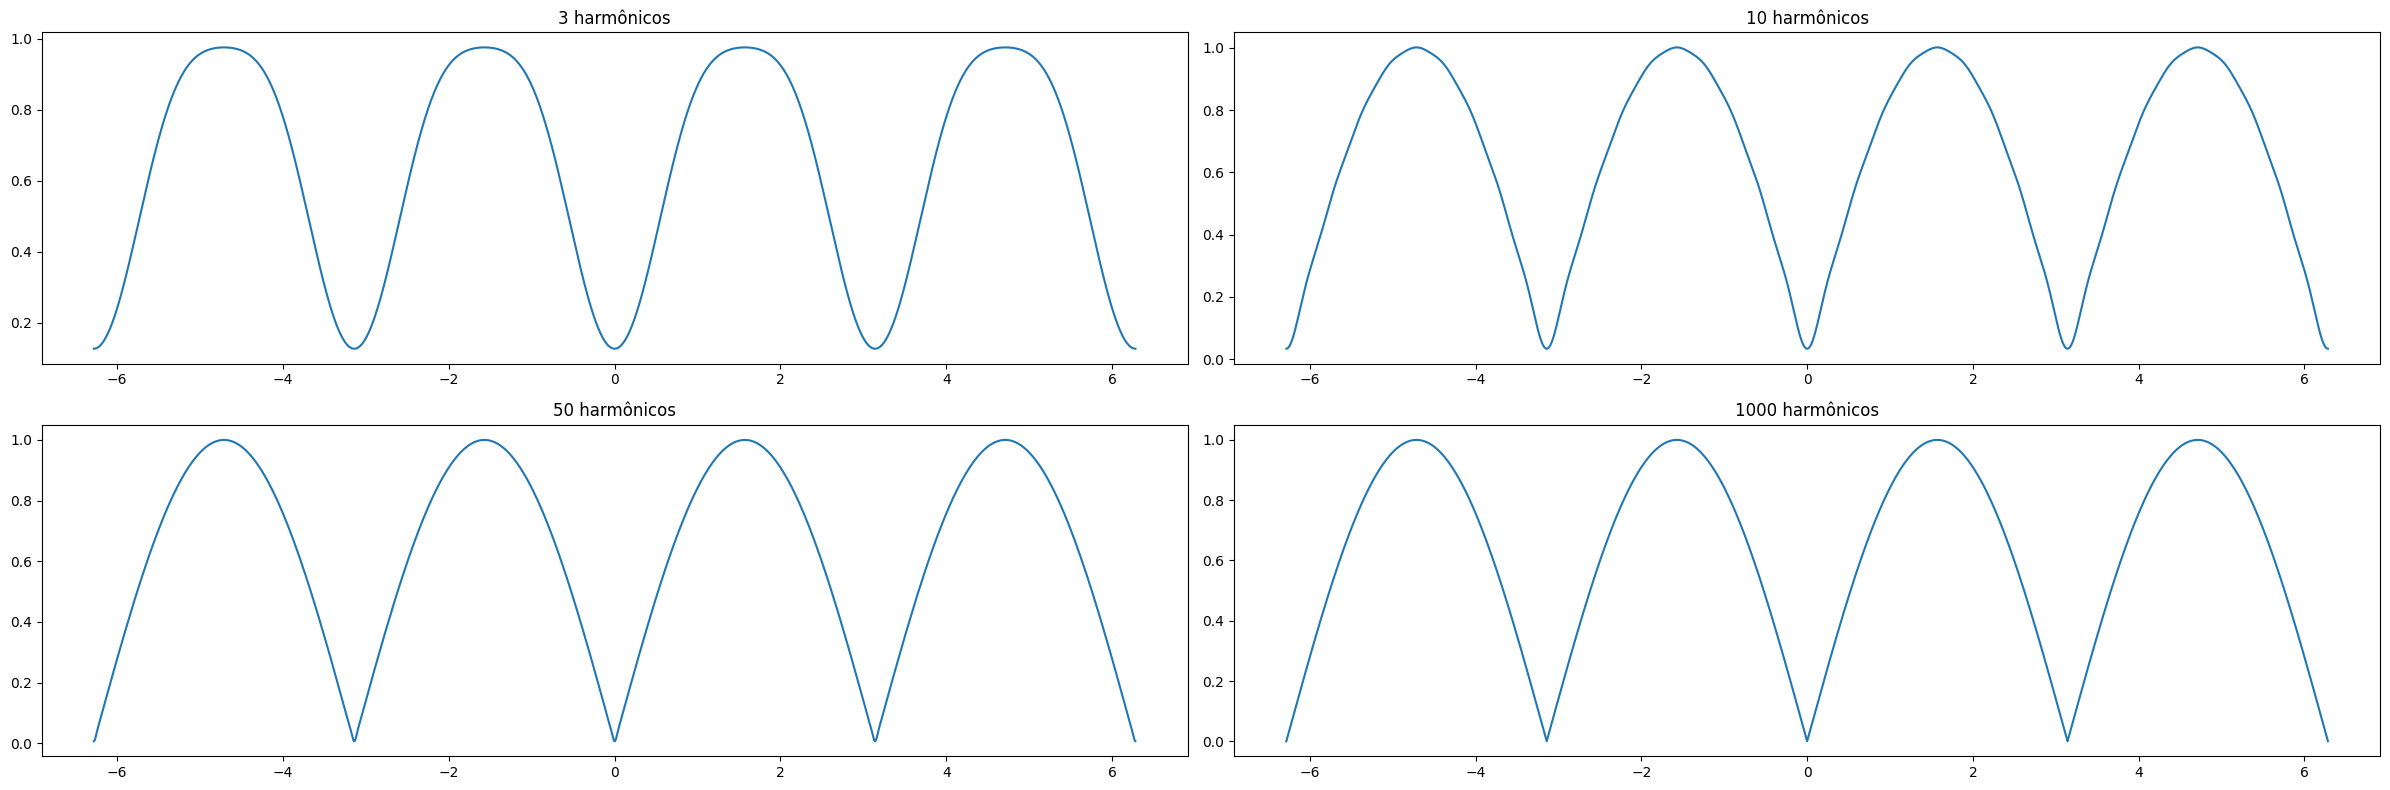

In [99]:
#Série Exponencial de Fourier

t = np.arange(-2*pi, 2*pi, 0.001)                                 # Limitando a variação entre -2pi e 2pi com passo 0,001

def exponential_serie(Nh):                                          # Cálculo da série exponencial em relação à quantidade de harmônicos
    x = np.zeros(t.shape).astype('complex128')                 # Inicialização do vetor para o resultado
    n = 1
    for n in range(1, Nh, 1):                        # Somatório
                                                               
        x += ((4*pow((pow(-1,n)),2))/(pi*(1-4*(pow(n,2)))))*np.cos(2*n*t)              #utilizei a identidade básica da trigonometria para transformas o cos^2(pi*n) em ((-1)^n)^2

    
    return x

plt.figure(figsize=(24,8))
plt.subplot(221)
plt.title('3 harmônicos')
plt.plot(t, np.real(exponential_serie(3)))
plt.subplot(222)
plt.title('10 harmônicos')
plt.plot(t, np.real(exponential_serie(10)))
plt.subplot(223)
plt.title('50 harmônicos')
plt.plot(t, np.real(exponential_serie(50)))
plt.subplot(224)
plt.title('1000 harmônicos')
plt.plot(t, np.real(exponential_serie(1000)))
plt.tight_layout()